# Complexity measure as peaks

In [14]:
from disassembly.simulate_proteolysis import enzyme_set, enzyme, amino_acids


kr = enzyme_set(
    [
        enzyme({"K": 1}, "K protease"),
    ],
    [1],
    [1],
)


viat = enzyme_set(
    [
        enzyme({"V": 0.35, "I": 0.25, "A": 0.2, "T": 0.1}, "V+I+A+T protease"),
    ],
    [1],
    [1],
)

random = enzyme_set(
    [enzyme({aa: 1 / len(amino_acids) for aa in amino_acids.values()}, "random")],
    [1],
    [1],
)
protein = "MKAAVLTLAVLFLTGSQARHFWQQDEPPQSPWDRVKDLATVYVDVLKDSGRDYVSQFEGSALGKQLNLKLLDNWDSVTSTFSKLREQLGPVTQEFWDNLEKETEGLRQEMSKDLEEVKAKVQPYLDDFQKKWQEEMELYRQKVEPLRAELQEGARQKLHELQEKLSPLGEEMRDRARAHVDALRTHLAPYSDELRQRLAARLEALKENGGARLAEYHAKATEHLSTLSEKAKPALEDLRQGLLPVLESFKVSFLSALEEYTKKLNTQ"

In [15]:
from disassembly.benchmark import Benchmark

n_iterations = 5
bmrk = Benchmark()

enzyme_sets = [kr, viat, random]
enzyme_names = ["K", "V+I+A+T", "random"]

bmrk.simulate_degradation(
    protein,
    enzyme_sets=enzyme_sets,
    enzyme_names=enzyme_names,
    n_generate=100,
    endo_or_exo_probability=[0.9, 0.1],
    iterations=n_iterations,
)

Running K, 0
 0 / 100 (1)

 44 / 100 (53)

/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:227: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values()) for p in index_to_cut.values()


 99 / 100 (122)
56 unique peptides. 103 total

 Averaged DI: 1.46
Running K, 1
 99 / 100 (107)
62 unique peptides. 104 total

 Averaged DI: 1.48
Running K, 2
 99 / 100 (113)
49 unique peptides. 103 total

 Averaged DI: 1.47
Running K, 3
 99 / 100 (115)
61 unique peptides. 103 total

 Averaged DI: 1.50
Running K, 4
 99 / 100 (126)
55 unique peptides. 103 total

 Averaged DI: 1.58
Running V+I+A+T, 0
 99 / 100 (113)
73 unique peptides. 103 total

 Averaged DI: 1.54
Running V+I+A+T, 1
 99 / 100 (113)
78 unique peptides. 103 total

 Averaged DI: 1.57
Running V+I+A+T, 2
 99 / 100 (113)
74 unique peptides. 103 total

 Averaged DI: 1.49
Running V+I+A+T, 3
 99 / 100 (113)
80 unique peptides. 103 total

 Averaged DI: 1.48
Running V+I+A+T, 4
 99 / 100 (111)
84 unique peptides. 103 total

 Averaged DI: 1.39
Running random, 0
 99 / 100 (109)
101 unique peptides. 103 total

 Averaged DI: 1.73
Running random, 1
 99 / 100 (105)
101 unique peptides. 103 total

 Averaged DI: 1.66
Running random, 2
 99 /

In [16]:
import numpy as np
from disassembly.util import KL

dct = {"e": [], "i": [], "error": [], "kl": [], "d": []}
for enzyme_name in bmrk.enzyme_names:

    for iteration in range(bmrk.iterations):

        spaces = np.zeros(len(protein))

        for sequence, copy_number in bmrk.simulated_peptidomes[enzyme_name][
            iteration
        ].items():
            start = protein.find(sequence)
            end = start + len(sequence)
            spaces[start:end] += copy_number

        mean = np.mean(spaces)
        error = np.sum(np.abs(spaces - mean) ** 2)
        kl = KL(np.ones(len(protein)) * mean, spaces)
        dct["e"].append(enzyme_name)
        dct["i"].append(iteration)
        dct["error"].append(error)
        dct["kl"].append(kl)
        dct["d"].append(bmrk.results["real"][enzyme_name][iteration]["d"])

<Axes: xlabel='kl', ylabel='Density'>

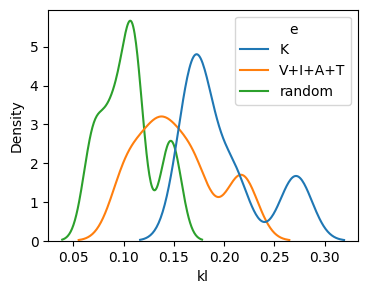

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dct_df = pd.DataFrame(dct)
plt.figure(figsize=(4, 3))
sns.kdeplot(dct_df, x="kl", hue="e", bw_adjust=0.5)

<Axes: xlabel='d', ylabel='Density'>

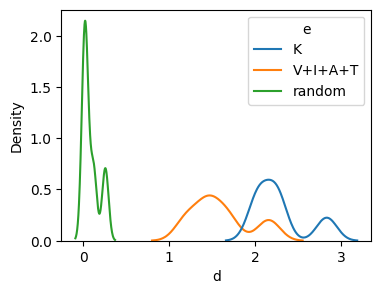

In [18]:
plt.figure(figsize=(4, 3))
sns.kdeplot(dct_df, x="d", hue="e", bw_adjust=0.5)

Text(0.5, 1.0, 'n_generate=1000')

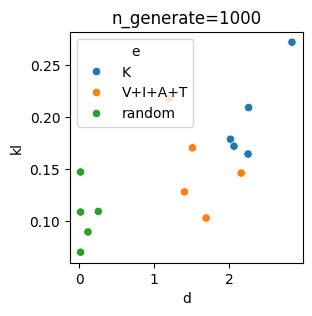

In [19]:
plt.figure(figsize=(3, 3))
sns.scatterplot(dct_df, x="d", y="kl", hue="e")
plt.title("n_generate=1000")

# Regex enzyme

In [2]:
from disassembly.simulate_proteolysis_regex import ProteolysisSimulator

ps = ProteolysisSimulator()
protein_sequence = "MSGRGKGGKGKLGKGGAKRHRKVLRDNIQGITKPAIKRRLARRGGVKRISKGLIYEETRGVLKVFLENVIRDAVTYTEHAKRKTVTAMDVVKYALKRQGRTLYGFGG"

true_distribution = ps.simulate_proteolysis(
    protein_sequence, n_generate=500, graph=False
)
true_distribution

 0 / 500 (1)

 499 / 500 (650)
89 unique peptides. 510 total


{'MSGRGKGGKGKLGKGGAKRHRKVLRDNIQGITKPAIKRRLARRGGVKRISKGLIYEETRGVLKVFLENVIRDAVTYTEHAKRKTVTAMDVVKYALKRQGRTLYGFGG': 10,
 'DNIQGITKPAIK': 10,
 'GLIYEETR': 10,
 'GVLKVFLENVIR': 16,
 'GGVKRISKGLIYEETR': 7,
 'GGVKRISKGLIYEET': 4,
 'GVLKVFLENVI': 11,
 'GKGGKGK': 7,
 'DNIQGITKPAI': 7,
 'YALKRQGR': 23,
 'RKTVTAMDVVK': 16,
 'DNIQGITKPA': 10,
 'GGVKRISKGLIYEE': 5,
 'GKGGKGKLGKGGAK': 9,
 'GVLKVFLENV': 9,
 'GVLKVFLEN': 8,
 'DAVTYTEHAK': 18,
 'GGKGKLGK': 40,
 'GGVKRISK': 3,
 'DNIQGITKP': 15,
 'DNIQGITK': 13,
 'LGKGGAK': 7,
 'GKGGKGKLGKGGA': 2,
 'LGKGGAKRHRKVLR': 4,
 'RISKGLI': 4,
 'TVTAMDVVK': 15,
 'GGAKRHR': 20,
 'GGVKRIS': 4,
 'RISKGLIYEE': 9,
 'RKTVTAMDVV': 11,
 'YALKRQG': 7,
 'RHRKVLR': 2,
 'GGKGKLG': 12,
 'VFLENVI': 2,
 'RISKGLIYEETR': 20,
 'DAVTYTEHA': 9,
 'RRLARRGGVKRISKGLIYEETR': 3,
 'DNIQGIT': 3,
 'TVTAMDVV': 2,
 'LARRGGVK': 23,
 'RISKGLIYEET': 9,
 'ISKGLIYEET': 1,
 'TVTAMD': 1,
 'RISKGLIYE': 7,
 'DAVTYTEHAKRKTVTAMDVVKYALKRQGR': 1,
 'DNIQGITKPAIKRRLARR': 2,
 'TKPAIK': 2,
 'DAVTYTEH': 6,
 'DNI

# Genetic algorithm to get cleavage spec

In [10]:
from disassembly.simulate_proteolysis_regex import Enzyme
from disassembly.util import amino_acids, normalize_dict, KL
import random
import math
import re

amino_acids = list(amino_acids.values())


class Individual:
    """
    Class that represents an individual
    Has checks to assure that the regex doesn't break any rules
    """

    def __init__(self, rules: str = None) -> None:
        if rules:
            if isinstance(rules, str):
                self.rules = rules
            elif isinstance(rules, list):
                self.compile(rules)

    def get_length_of_match(self):
        return len(self.split())

    def split(self):
        components = []
        for i, char in enumerate(self.rules):
            if char == "(":
                k = i
            if char == ")":
                components.append(self.rules[k + 1 : i])
        return components

    def compile(self, list_of_operators):
        self.rules = ""
        for operator in list_of_operators:
            self.rules += f"({operator})"
        try:
            re.compile(self.rules)
        except re.error:
            print(self.rules, " is not a valid regex pattern")

    def mutate(self):
        position = random.randint(0, 5)  # index to mutate
        add_or_delete = random.choice(["add", "delete"])
        type = random.choice(["inclusion", "exclusion"])
        list_of_operators = self.split()
        operator: str = list_of_operators[position]

        if operator == ".":
            add_or_delete = "add"
        aa = random.choice(amino_acids)

        if aa in operator:
            add_or_delete = "delete"

        if add_or_delete == "add":

            if type == "inclusion":

                if operator == ".":
                    new_operator = f"[{aa}]"
                else:
                    if "^" in operator:
                        new_operator = (
                            "["
                            + operator.removeprefix("[^").removesuffix("]")
                            + f"|{aa}]"
                        )
                    else:
                        new_operator = (
                            "["
                            + operator.removeprefix("[").removesuffix("]")
                            + f"|{aa}]"
                        )

            elif type == "exclusion":

                if operator == ".":
                    new_operator = f"[^{aa}]"
                else:
                    if "^" in operator:
                        new_operator = (
                            "["
                            + operator.removeprefix("[").removesuffix("]")
                            + f"|{aa}]"
                        )
                    else:
                        new_operator = (
                            "[^"
                            + operator.removeprefix("[").removesuffix("]")
                            + f"|{aa}]"
                        )

        elif add_or_delete == "delete":
            if operator == ".":

                self.compile(list_of_operators)
                return

            ops = operator.split("|")
            if len(ops) == 1:
                new_operator = "."
            else:
                n_ops = len(ops)
                i_del = random.randint(0, n_ops - 1)
                ops.remove(ops[i_del])
                new_operator = "|".join(ops)
                new_operator = (
                    "[" + new_operator.removeprefix("[").removesuffix("]") + "]"
                )

        list_of_operators[position] = new_operator
        self.compile(list_of_operators)

    def __repr__(self) -> str:
        return self.rules


class ParameterEstimatorGA:
    def __init__(
        self,
        true_distribution: dict,
        protein_sequence: str,
        mutation_rate: float = 0.1,
        n_individuals: int = 10,
        pattern_len: int = 6,
        kill_fraction: int = 0.5,
        n_generate: int = 200,
        length_penalty: float = 0.1,
    ) -> None:
        """
        Initiate a random population
        """
        self.n_generate = int(sum(true_distribution.values()))
        self.true_distribution = normalize_dict(true_distribution)
        self.mutation_rate = mutation_rate
        self.n_individuals = n_individuals
        self.protein_sequence = protein_sequence
        self.pattern_len = pattern_len
        self.n_kill = math.floor(kill_fraction * n_individuals)
        print("N Kill ", self.n_kill)
        self.n_generate = n_generate
        self.length_penalty = length_penalty
        self.ps = ProteolysisSimulator(verbose=False)

        self.population = {}  # dict of Enzyme:fitness
        for _ in range(n_individuals):
            random_regex = self._generate_random_regex()
            individual = Individual(random_regex)
            self.population[individual] = 0  # fitness

        self.evaluate_fitness()

    def run(self, n_generations: int = 10):
        """
        Main run-method
        """
        self.best_ever = None
        self.best_ever_fitness = 10e3
        self.fitness = {}
        self.fitness[-1] = list(self.population.values())
        for generation in range(n_generations):
            self.kill_reproduce()
            self.mutate()
            self.evaluate_fitness()
            best_individual = list(self.population.keys())[0]
            best_fitness = self.population[best_individual]
            if best_fitness < self.best_ever_fitness:
                self.best_ever = best_individual
            print(best_individual, best_fitness)
            self.fitness[generation] = list(self.population.values())

    def evaluate_fitness(self):
        """
        Evaluate fitness of individuals:

        - simulate proteolysis with given rules (individuals)
        - Compute similarity to true distribution
        """
        for individual in self.population.keys():
            e = Enzyme("_", cleavage_rules={individual.rules: 1})
            t_hat = self.ps.simulate_proteolysis(
                protein_sequence,
                enzyme=e,
                n_generate=self.n_generate,
                graph=False,
                length_params="vitro",
            )
            penalty = self.length_penalty * len(re.findall("[A-Z]", individual.rules))
            t_hat = normalize_dict(t_hat)
            t1, t2 = self._make_comparable(t_hat, self.true_distribution)
            loss = KL(t1, t2) + KL(t2, t1) + penalty
            self.population[individual] = loss

        self.population = {
            k: v for k, v in sorted(self.population.items(), key=lambda item: item[1])
        }

    def kill_reproduce(self):
        """
        Combine kill and reroduce into one method
        """
        keys = list(self.population.keys())
        not_kill = keys[: self.n_individuals - self.n_kill]
        kill = keys[self.n_individuals - self.n_kill :]

        for key in kill:
            self.population.pop(key)  # kill individual
            parents = random.choices(not_kill, k=2)
            offspring = self.mate(parents[0], parents[1])  # reproduce
            self.population[offspring] = 0

    def mate(self, ind1: Individual, ind2: Individual):
        """
        Pair 2 individuals to create a new
        """
        position = random.randint(0, 5)
        ind1_operators = ind1.split()
        ind2_operators = ind2.split()

        part_from1 = ind1_operators[:position]
        part_from2 = ind2_operators[position:]
        new_operators = part_from1 + part_from2
        offspring = Individual(new_operators)
        return offspring

    def mate2(self, ind1, ind2):
        ind1_operators = ind1.split()
        ind2_operators = ind2.split()
        new_operators = []
        for i in range(self.pattern_len):
            ind1_i: str = ind1_operators[i]
            ind2_i: str = ind2_operators[i]

            ind1_i_exclusion = "^" in ind1_i
            ind2_i_exclusion = "^" in ind2_i

            if ind1_i_exclusion:
                ind1_i = ind1_i.removeprefix("[^").removesuffix("]")
            else:
                ind1_i = ind1_i.removeprefix("[").removesuffix("]")

            if ind2_i_exclusion:
                ind2_i = ind2_i.removeprefix("[^").removesuffix("]")
            else:
                ind2_i = ind2_i.removeprefix("[").removesuffix("]")

            if ind1_i_exclusion and ind2_i_exclusion:
                merged_operator = "[^" + ind1_i + "|" + ind2_i + "]"
            elif ind1_i_exclusion:
                merged_operator = "[" + ind1_i + "|" + ind2_i + "]"
            elif ind2_i_exclusion:
                merged_operator = "[" + ind1_i + "|" + ind2_i + "]"
            else:
                merged_operator = "[" + ind1_i + "|" + ind2_i + "]"

            merged_operator = re.sub("(\|\.)", "", merged_operator)
            merged_operator = re.sub("(\.\|)", "", merged_operator)
            merged_operator = re.sub("(\[\.\])", ".", merged_operator)

            new_operators.append(merged_operator)

        offspring = Individual(new_operators)
        return offspring

    def mutate(self):
        """
        Mutates individuals randomly
        """
        keys = list(self.population.keys())
        for individual in keys[1:]:  # elitism
            u = random.random()
            if u <= self.mutation_rate:
                self.population.pop(individual)
                individual.mutate()
                self.population[individual] = 0

    def _generate_random_regex(self):
        """
        Generate a random regex
        """
        random_regex = ""
        for _ in range(self.pattern_len):
            u = random.randint(0, 1)
            if u == 0:
                random_regex += "(.)"
            else:
                u = random.randint(0, 1)
                aa = random.choice(amino_acids)
                if u == 0:  # exclusion
                    random_regex += f"([^{aa}])"
                else:
                    random_regex += f"([{aa}])"
        return random_regex

    def _make_comparable(self, t1, t2):
        """
        Aligns two dicts and outputs the aligned value-vectors
        """
        t1_vec = []
        t2_vec = []
        for key in t1.keys():
            t1_vec.append(t1[key])
            if key in t2.keys():
                t2_vec.append(t2[key])
            else:
                t2_vec.append(0)
        for key in t2.keys():
            if key not in t1.keys():
                t1_vec.append(0)
                t2_vec.append(t2[key])
        return t1_vec, t2_vec


pega = ParameterEstimatorGA(
    true_distribution,
    protein_sequence,
    n_individuals=30,
    mutation_rate=0.9,
    kill_fraction=0.5,
    n_generate=200,
    length_penalty=0.5,
)
pega.run(n_generations=20)

N Kill  15
(.)([G])(.)(.)(.)(.) 19.796155189174463
([^Q])(.)([D])([F])([W])(.) 23.7173578837467
(.)([G])(.)(.)(.)(.) 23.166510860658317
(.)([G])(.)(.)(.)(.) 20.971660694687543
(.)(.)([K])(.)(.)(.) 20.612215534486616
(.)(.)([K])(.)(.)(.) 21.695591933492377
(.)(.)([K])(.)(.)(.) 21.91252497352225
([^W])(.)([K])(.)([^Q])(.) 19.8494183899616
(.)([G])(.)(.)(.)(.) 21.25860096116385
(.)(.)([K])(.)([^M])(.) 22.037383701315058
(.)([G])([K])([^K])([^K])(.) 20.244599326912027
(.)(.)([K])(.)(.)(.) 19.623499024117805
(.)([^Q])([K])(.)([^M])(.) 21.512285499051345
(.)(.)([K|G])(.)([^M])(.) 20.54117554486128
([^N])([G|C])([K])([^V])([^M])(.) 20.476315124509142
([^N])([G|C])([K|S])(.)([^K|W])([^T]) 18.49228924615077
([^N])([G|C])([K])([^V])([^M])(.) 17.492486848926347
([^N])([G|C])([K])(.)([^M])(.) 20.463199152611082
([^N])([G|C])([K])(.)([^M])(.) 16.992486848926347
([^N])([G|C])([K])(.)([^M])(.) 16.99298830002778


In [12]:
pega.best_ever

([^N])([G|C])([K])(.)([^M])(.)

<Axes: xlabel='level_0', ylabel='0'>

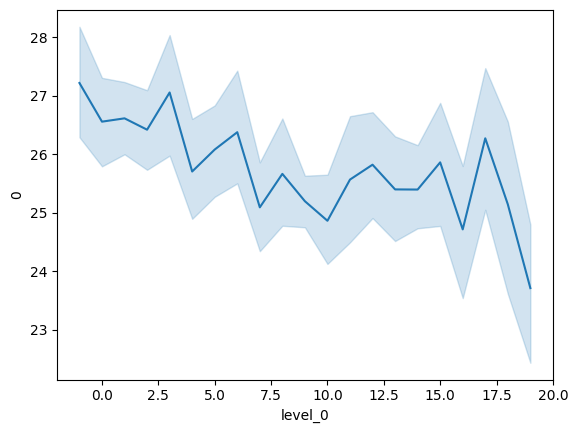

In [11]:
import pandas as pd
import seaborn as sns

sns.lineplot(pd.DataFrame(pega.fitness).T.stack().reset_index(), x="level_0", y=0)